___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [2]:
import sklearn
print(f"pandas = {pd.__version__}\n"
      f"numpy = {np.__version__}\n"
      f"seaborn = {sns.__version__}\n"
      f"scikit-learn = {sklearn.__version__}")

pandas = 2.1.4
numpy = 1.26.4
seaborn = 0.12.2
scikit-learn = 1.5.0


# Loading data and EDA

In [3]:
df = pd.read_csv("cement_slump.csv")
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,103.0,229.894175,78.877230,137.00,152.00,248.00,303.900,374.00
Slag,103.0,77.973786,60.461363,0.00,0.05,100.00,125.000,193.00
Fly ash,103.0,149.014563,85.418080,0.00,115.50,164.00,235.950,260.00
Water,103.0,197.167961,20.208158,160.00,180.00,196.00,209.500,240.00
SP,103.0,8.539806,2.807530,4.40,6.00,8.00,10.000,19.00
Coarse Aggr.,103.0,883.978641,88.391393,708.00,819.50,879.00,952.800,1049.90
Fine Aggr.,103.0,739.604854,63.342117,640.60,684.50,742.70,788.000,902.00
SLUMP(cm),103.0,18.048544,8.750844,0.00,14.50,21.50,24.000,29.00
FLOW(cm),103.0,49.610680,17.568610,20.00,38.50,54.00,63.750,78.00
Compressive Strength (28-day)(Mpa),103.0,36.038738,7.837120,17.19,30.90,35.52,41.205,58.53


In [6]:
df.corr()['Compressive Strength (28-day)(Mpa)'].sort_values(ascending=False)[1:]

Cement          0.445656
Fly ash         0.444380
SP             -0.037909
FLOW(cm)       -0.124189
Fine Aggr.     -0.154532
Coarse Aggr.   -0.160610
SLUMP(cm)      -0.223499
Water          -0.254320
Slag           -0.331522
Name: Compressive Strength (28-day)(Mpa), dtype: float64

## Graphical analysis

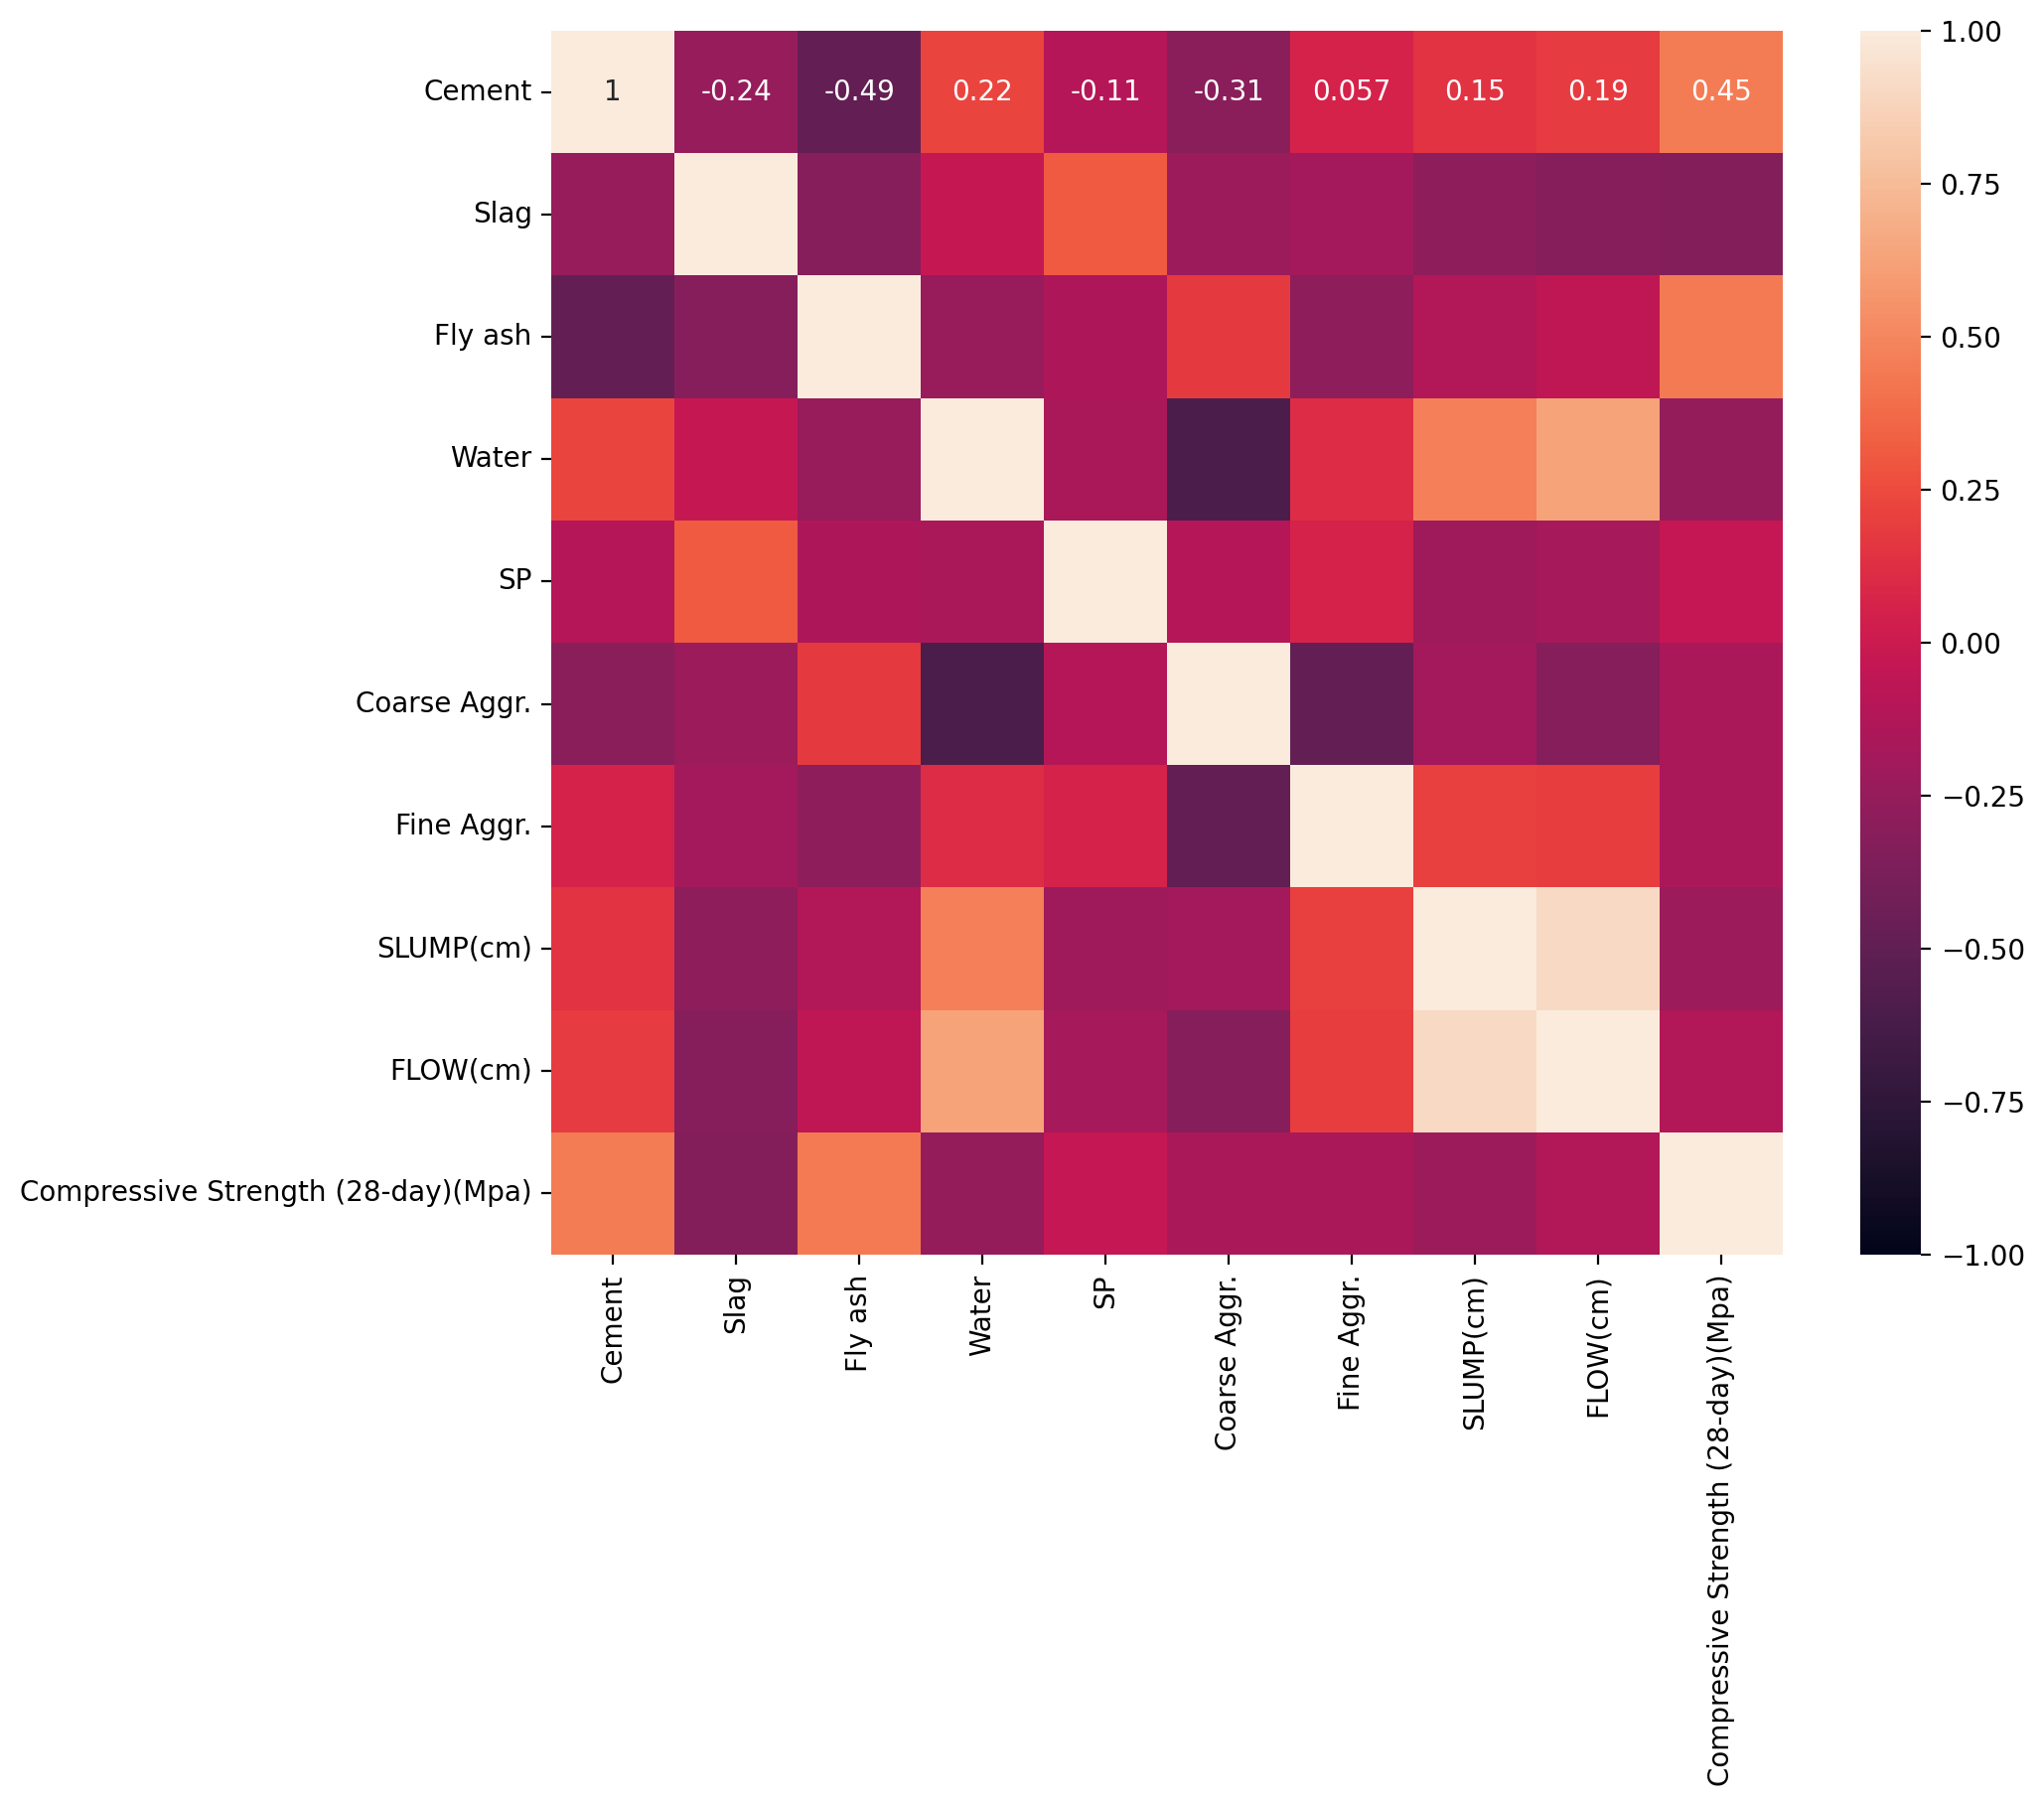

In [7]:
plt.figure(figsize=(10, 8), dpi=200)
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1);

C:\Users\nurda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nurda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nurda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nurda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

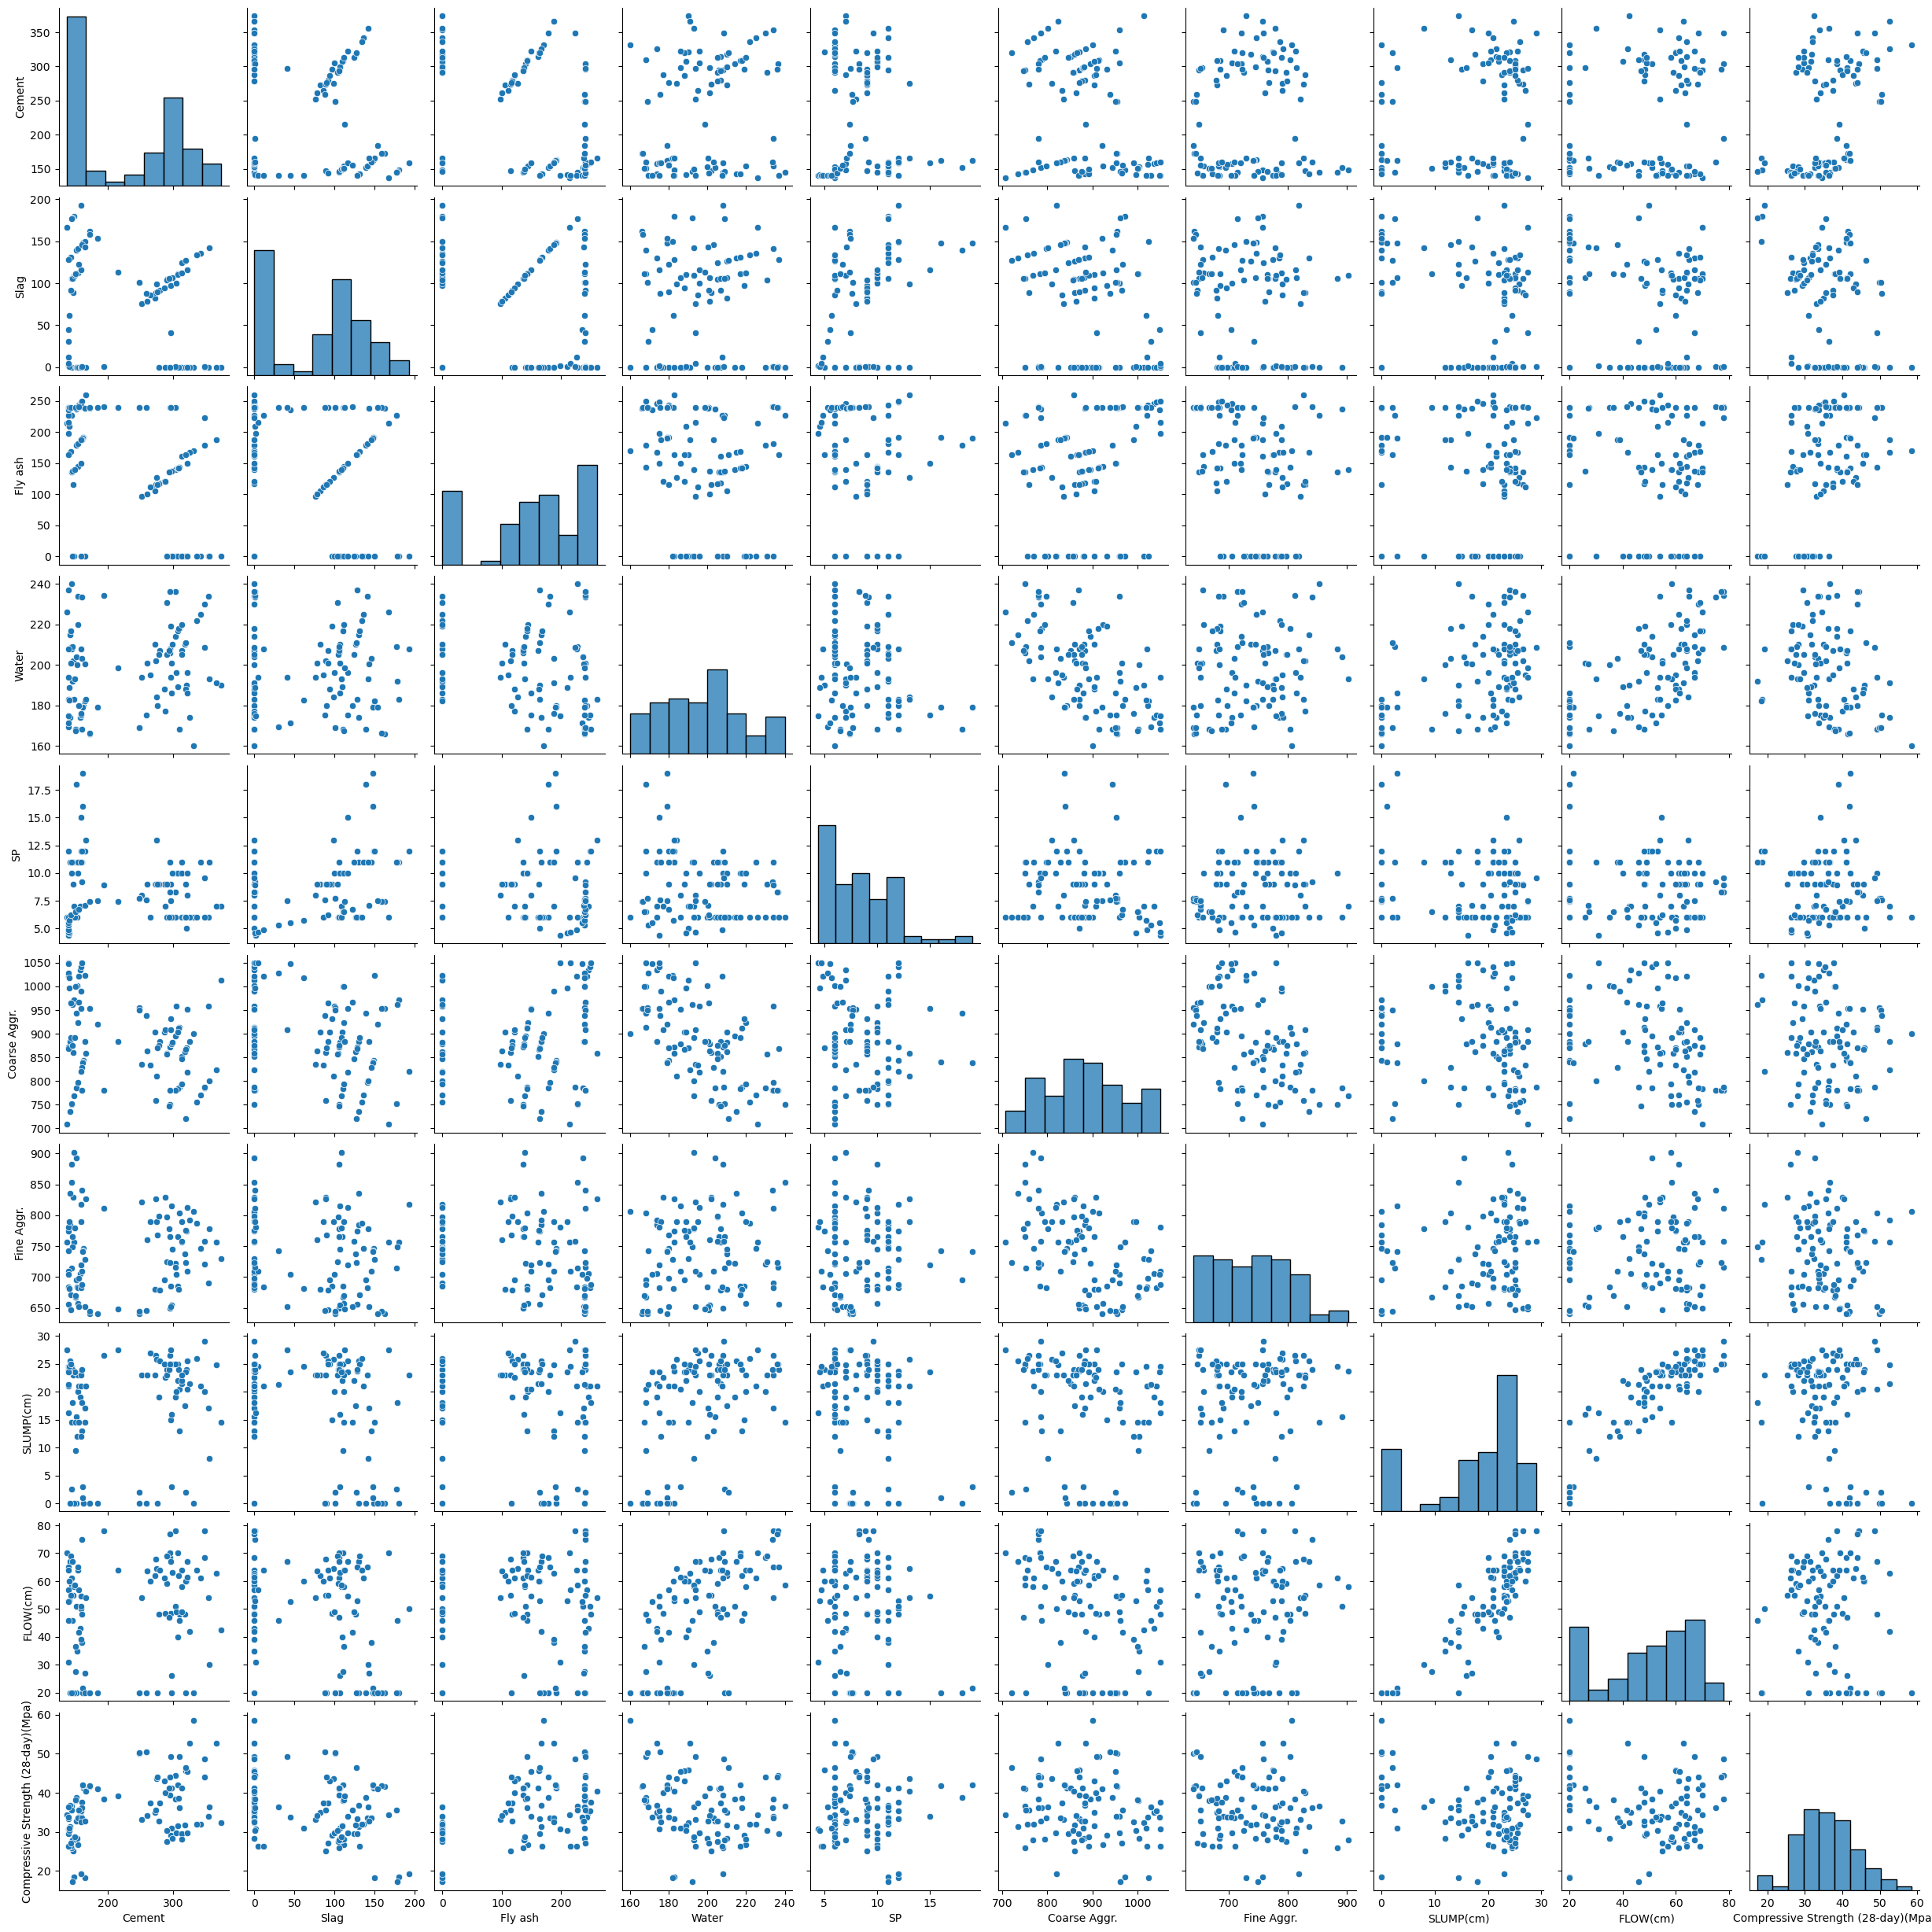

In [8]:
sns.pairplot(df);

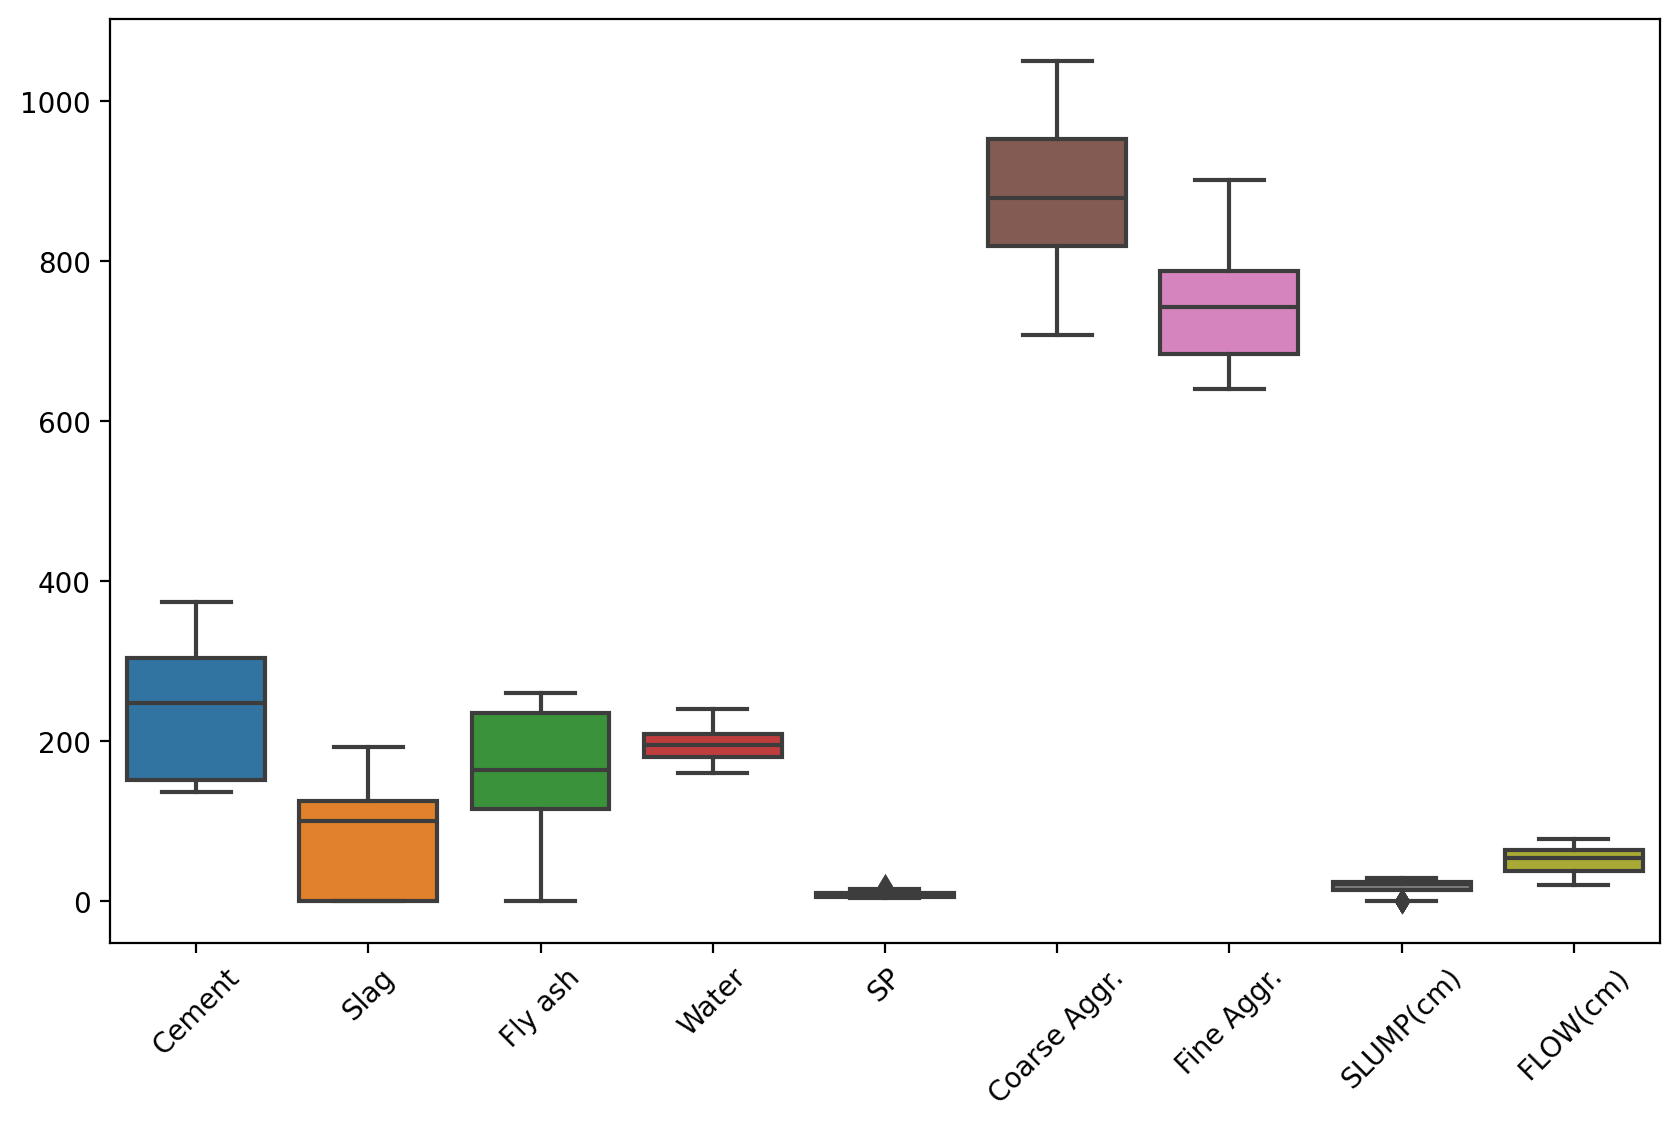

In [9]:
# boxplots for all features in df
plt.figure(figsize =(10,6), dpi=200)
sns.boxplot(df.iloc[:,:-1])
plt.xticks(rotation=45);

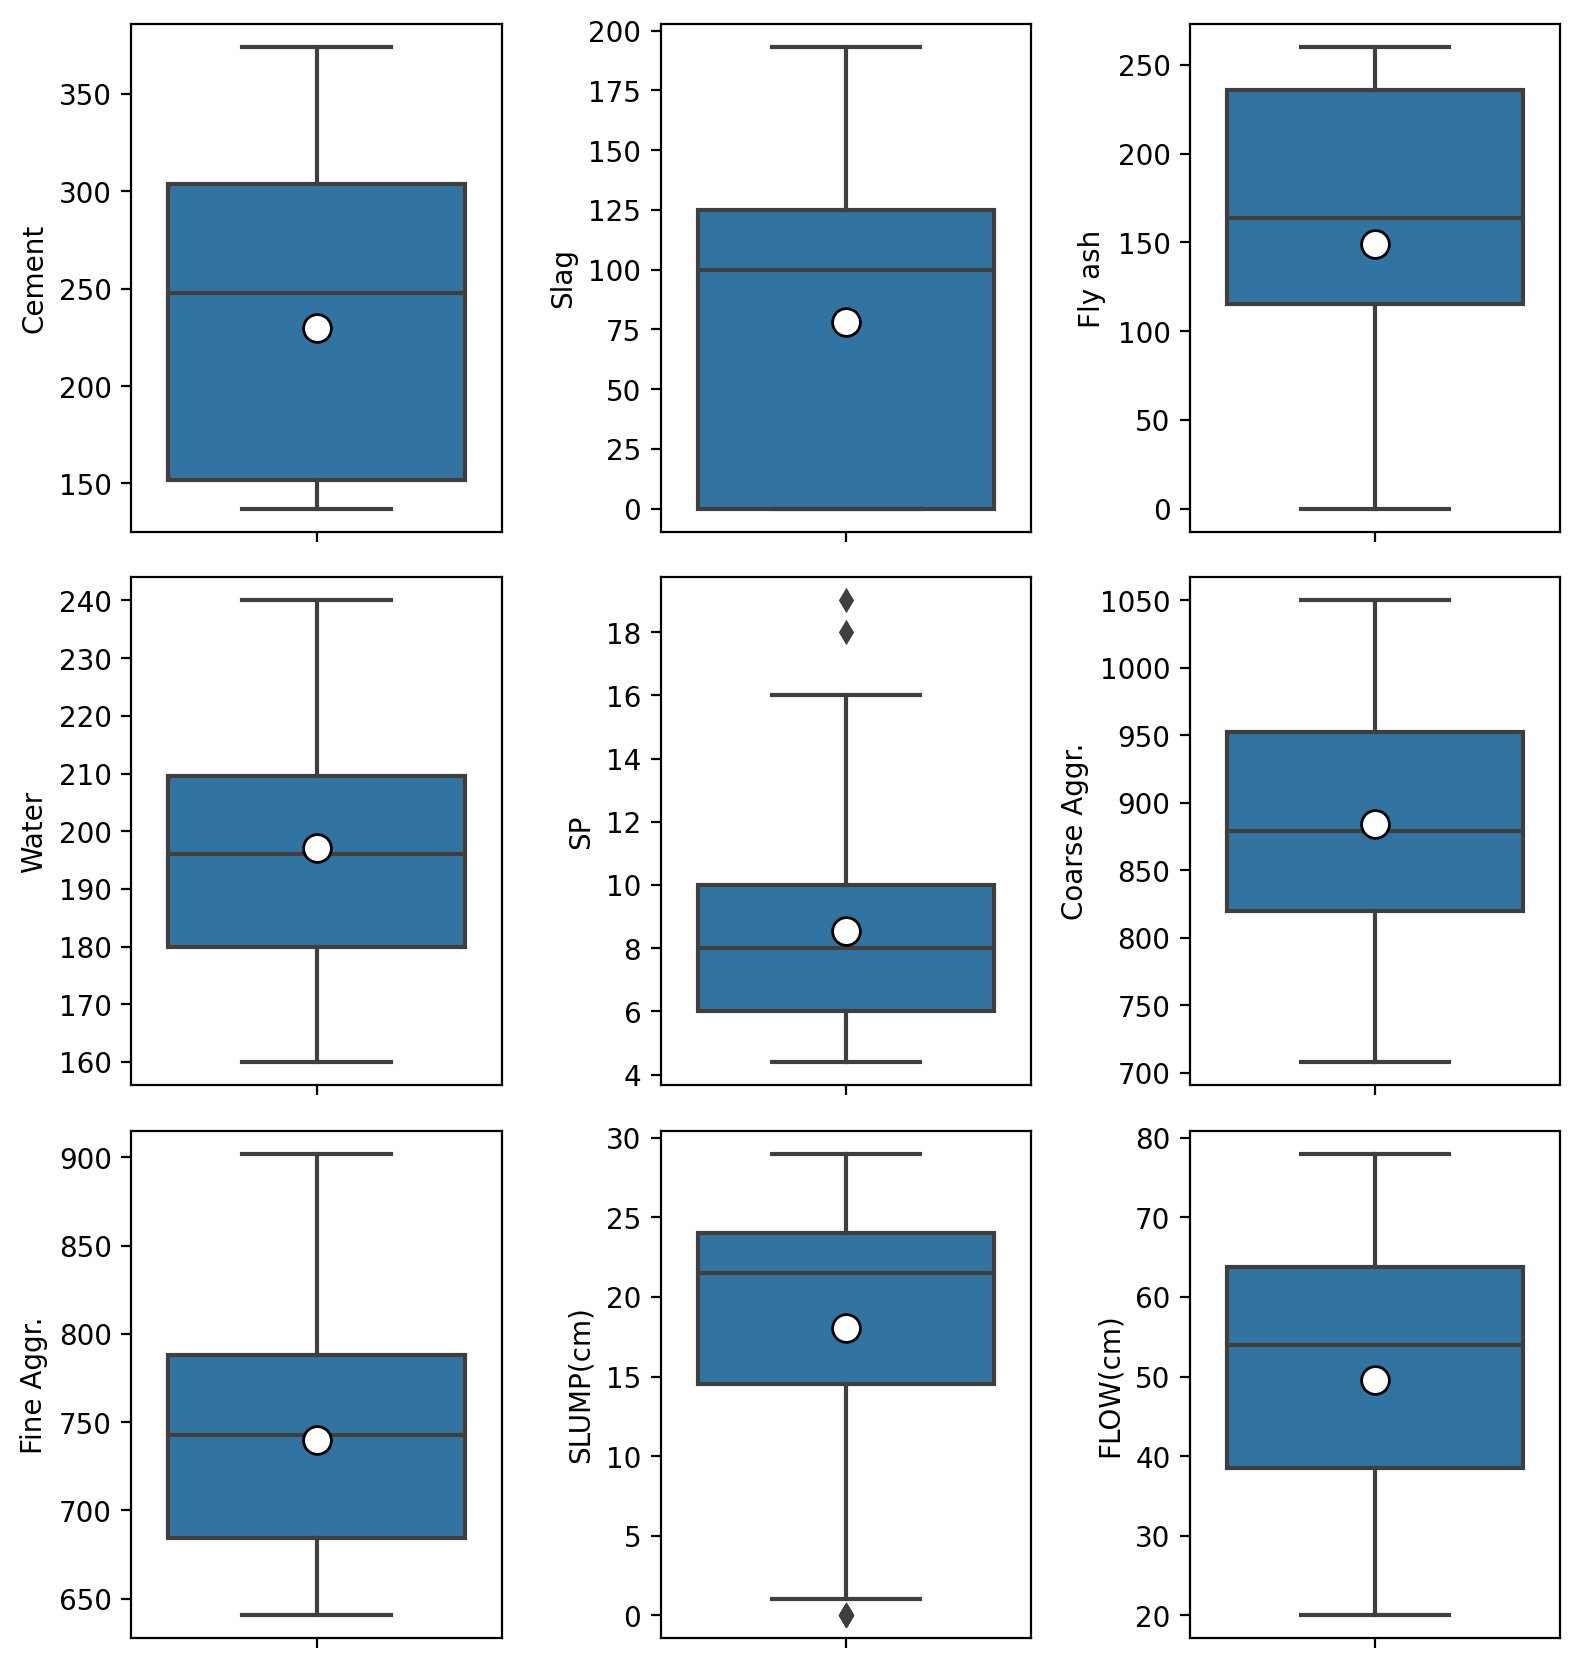

In [10]:
# boxplot for each column
fig = plt.figure(figsize=(8,25), dpi=200)
for i, col in enumerate(df.iloc[:,:-1]):
        plt.subplot(9, 3, i+1)
        sns.boxplot(y=col, data=df,
                    showmeans=True,
                    meanprops={"marker":"o",
                               "markerfacecolor":"white",
                               "markeredgecolor":"black",
                               "markersize":"10"})
plt.tight_layout();

### Varience Inflation Factor

In [11]:
# multicollinearity check with VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = df.drop("Compressive Strength (28-day)(Mpa)", axis =1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

pd.DataFrame(vif_data)

,feature,VIF
0,Cement,14.519378
1,Slag,4.701056
2,Fly ash,6.539719
3,Water,165.730216
4,SP,12.378538
5,Coarse Aggr.,57.562954
6,Fine Aggr.,97.849328
7,SLUMP(cm),39.144890
8,FLOW(cm),90.649065


### Train | Test Split

In [12]:
X = df.drop("Compressive Strength (28-day)(Mpa)", axis =1)
y = df["Compressive Strength (28-day)(Mpa)"]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling the Data

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [16]:
scaler = StandardScaler() # will be used in pipeline later

In [17]:
# if you don't use pipeline, you can use scaler directly

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression

In [18]:
from sklearn.pipeline import Pipeline # pipeline is used to combine scaler and model

In [19]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression() # will be used in pipeline later

In [20]:
pipe_lm = Pipeline([("scaler", scaler), ("lm", lm)]) # pipeline is used to combine scaler and model

In [21]:
pipe_lm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lm', LinearRegression())])

In [22]:
y_pred = pipe_lm.predict(X_test) # predict on test data
y_train_pred = pipe_lm.predict(X_train) # predict on train data

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def train_val(y_train, y_train_pred, y_test, y_pred, model_name):

    scores = {model_name+"_train": {"R2": r2_score(y_train, y_train_pred),
                                    "mae": mean_absolute_error(y_train, y_train_pred),
                                    "mse": mean_squared_error(y_train, y_train_pred),
                                    "rmse": np.sqrt(mean_squared_error(y_train, y_train_pred)),
                                   "mape": mean_absolute_percentage_error(y_train, y_train_pred)},

    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
                         "mae" : mean_absolute_error(y_test, y_pred),
                         "mse" : mean_squared_error(y_test, y_pred),
                         "rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
                         "mape": mean_absolute_percentage_error(y_test, y_pred)}}

    return pd.DataFrame(scores)

In [24]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear") # train and test scores
ls

,linear_train,linear_test
R2,0.907145,0.911967
mae,1.936263,1.740383
mse,5.874313,4.454237
rmse,2.423698,2.110506
mape,0.056114,0.047230


## Cross Validate

In [25]:
# from sklearn.metrics import SCORERS
# list(SCORERS.keys())

In [26]:
from sklearn.model_selection import cross_validate, cross_val_score

In [27]:
model = Pipeline([("scaler", scaler), ("lm", lm)])
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring = ['r2',
                                   'neg_mean_absolute_error',
                                   'neg_mean_squared_error',
                                   'neg_root_mean_squared_error',
                                   'neg_mean_absolute_percentage_error'],
                        return_train_score=True,
                        cv = 5)

In [28]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.003582,0.002218,0.942208,0.889511,-1.908524,-1.987222,-4.645188,-6.475447,-2.155270,-2.544690,-0.059247,-0.057159
2,0.003015,0.001998,0.706629,0.931756,-2.647319,-1.742745,-10.756658,-4.791340,-3.279734,-2.188913,-0.075128,-0.050255
3,0.002504,0.002429,0.865934,0.908007,-1.482831,-2.045174,-3.725762,-6.535942,-1.930223,-2.556549,-0.041739,-0.060113
4,0.003063,0.003526,0.923166,0.894885,-2.244108,-1.873938,-8.434009,-5.447800,-2.904137,-2.334052,-0.062416,-0.054113
5,0.003320,0.003500,0.792889,0.919749,-2.867905,-1.791743,-11.698265,-5.161329,-3.420273,-2.271856,-0.084192,-0.052002


In [29]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

# cross_validation is done to verify whether the one-time score from test set is consistent
# train score and cross validation score are compared and overfitting is decided

test_r2                                     0.846165
train_r2                                    0.908782
test_neg_mean_absolute_error               -2.230137
train_neg_mean_absolute_error              -1.888165
test_neg_mean_squared_error                -7.851977
train_neg_mean_squared_error               -5.682371
test_neg_root_mean_squared_error           -2.737927
train_neg_root_mean_squared_error          -2.379212
test_neg_mean_absolute_percentage_error    -0.064544
train_neg_mean_absolute_percentage_error   -0.054728
dtype: float64

In [30]:
pipe_lm["lm"].coef_

array([ 4.28015177, -2.22287954,  3.9320198 , -4.77083923,  0.12109966,
       -5.27729122, -2.61131342, -2.18837804,  1.46570621])

In [31]:
lm_df = pd.DataFrame(pipe_lm["lm"].coef_, index=X_train.columns, columns = ["lm_coef"])
lm_df

,lm_coef
Cement,4.280152
Slag,-2.222880
Fly ash,3.932020
Water,-4.770839
SP,0.121100
Coarse Aggr.,-5.277291
Fine Aggr.,-2.611313
SLUMP(cm),-2.188378
FLOW(cm),1.465706


## Ridge Regression

In [32]:
from sklearn.linear_model import Ridge

# Variance between train and test scores is reduced by adding bias to the model with Ridge
# Regularization increases as alpha increases

In [33]:
ridge_model = Ridge(alpha=1, random_state=42) # will be used in pipeline later

# big alpha means bir bias(error), i.e. big regularization

In [34]:
pipe_ridge = Pipeline([("scaler", scaler), ("ridge", ridge_model)]) # pipeline is used to combine scaler and model

In [35]:
pipe_ridge.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=1, random_state=42))])

In [36]:
y_pred = pipe_ridge.predict(X_test)
y_train_pred = pipe_ridge.predict(X_train)

In [37]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.906392,0.911204
mae,1.938096,1.732472
mse,5.921967,4.492822
rmse,2.433509,2.119628
mape,0.055908,0.046877


In [38]:
pd.concat([ls, rs], axis=1)  # combine train and test scores to compare

,linear_train,linear_test,ridge_train,ridge_test
R2,0.907145,0.911967,0.906392,0.911204
mae,1.936263,1.740383,1.938096,1.732472
mse,5.874313,4.454237,5.921967,4.492822
rmse,2.423698,2.110506,2.433509,2.119628
mape,0.056114,0.047230,0.055908,0.046877


## For Ridge Regression CV with alpha : 1

In [39]:
model = Pipeline([("scaler", scaler), ("ridge", ridge_model)])
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        return_train_score=True,
                        cv=5)

In [40]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                                     0.849918
train_r2                                    0.907560
test_neg_mean_absolute_error               -2.205105
train_neg_mean_absolute_error              -1.901143
test_neg_mean_squared_error                -7.688266
train_neg_mean_squared_error               -5.758474
test_neg_root_mean_squared_error           -2.708004
train_neg_root_mean_squared_error          -2.394884
test_neg_mean_absolute_percentage_error    -0.063538
train_neg_mean_absolute_percentage_error   -0.054891
dtype: float64

In [41]:
pipe_ridge["ridge"].coef_

array([ 5.01092233, -1.37765187,  4.8062743 , -3.90644878,  0.26138511,
       -4.06644253, -1.74660531, -1.95498663,  1.13349998])

In [42]:
rm_df = pd.DataFrame(pipe_ridge["ridge"].coef_, index= X_train.columns, columns = ["ridge_coef_1"])

In [43]:
pd.concat([lm_df,rm_df], axis = 1)

# features with large coefficients can be called important features and features with small coefficients can be called insignificant features
# ridge model groups the features as important an unimportant features

,lm_coef,ridge_coef_1
Cement,4.280152,5.010922
Slag,-2.222880,-1.377652
Fly ash,3.932020,4.806274
Water,-4.770839,-3.906449
SP,0.121100,0.261385
Coarse Aggr.,-5.277291,-4.066443
Fine Aggr.,-2.611313,-1.746605
SLUMP(cm),-2.188378,-1.954987
FLOW(cm),1.465706,1.133500


## Choosing best alpha value with Cross-Validation

In [44]:
from sklearn.linear_model import RidgeCV

In [45]:
alpha_space = np.linspace(0.1, 1, 100)
alpha_space

array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.38181818, 0.39090909, 0.4       , 0.40909091,
       0.41818182, 0.42727273, 0.43636364, 0.44545455, 0.45454545,
       0.46363636, 0.47272727, 0.48181818, 0.49090909, 0.5       ,
       0.50909091, 0.51818182, 0.52727273, 0.53636364, 0.54545455,
       0.55454545, 0.56363636, 0.57272727, 0.58181818, 0.59090909,
       0.6       , 0.60909091, 0.61818182, 0.62727273, 0.63636364,
       0.64545455, 0.65454545, 0.66363636, 0.67272727, 0.68181818,
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272

In [46]:
ridge_cv_model = RidgeCV(alphas=alpha_space,
                         cv = 10,
                         scoring= "neg_root_mean_squared_error") # will be used in pipeline later

In [47]:
pipe_ridgecv = Pipeline([("scaler", scaler), ("ridgecv", ridge_cv_model)]) # pipeline is used to combine scaler and model

In [48]:
pipe_ridgecv.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.336363...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         cv=10, scoring='neg_root_mean_squared_error'))])

In [49]:
pipe_ridgecv["ridgecv"].alpha_

0.9181818181818181

In [50]:
# Ridge( alpha = 0.91)
y_pred = pipe_ridgecv.predict(X_test)
y_train_pred = pipe_ridgecv.predict(X_train)

In [51]:
# Ridge Grid Model Scores

rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.906476,0.911355
mae,1.937773,1.732412
mse,5.916637,4.485191
rmse,2.432414,2.117827
mape,0.055914,0.046879


In [52]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827
mape,0.056114,0.047230,0.055908,0.046877,0.055914,0.046879


In [53]:
pipe_ridgecv["ridgecv"].coef_

array([ 5.00521265, -1.38945391,  4.79652108, -3.93170693,  0.25805802,
       -4.09232266, -1.76329842, -1.96996865,  1.15500214])

In [54]:
rcm_df = pd.DataFrame(pipe_ridgecv["ridgecv"].coef_, index= X_train.columns, columns=["ridge_cv_coef_0.91"])

In [55]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.91
Cement,4.280152,5.010922,5.005213
Slag,-2.222880,-1.377652,-1.389454
Fly ash,3.932020,4.806274,4.796521
Water,-4.770839,-3.906449,-3.931707
SP,0.121100,0.261385,0.258058
Coarse Aggr.,-5.277291,-4.066443,-4.092323
Fine Aggr.,-2.611313,-1.746605,-1.763298
SLUMP(cm),-2.188378,-1.954987,-1.969969
FLOW(cm),1.465706,1.133500,1.155002


## LASSO

In [56]:
from sklearn.linear_model import Lasso, LassoCV

In [57]:
lasso_model = Lasso(alpha=1, random_state=42)

In [58]:
pipe_lasso = Pipeline([("scaler", scaler), ("lasso", lasso_model)]) # pipeline is used to combine scaler and model

In [59]:
pipe_lasso.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=1, random_state=42))])

In [60]:
y_pred = pipe_lasso.predict(X_test)
y_train_pred = pipe_lasso.predict(X_train)

In [61]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

lss

# Compared to the ridge model, it looks underfitting
# the scores can be improved by the fine tuning

,lasso_train,lasso_test
R2,0.776425,0.801642
mae,2.959616,2.466012
mse,14.144056,10.036383
rmse,3.760858,3.168025
mape,0.088742,0.066884


In [62]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355,0.776425,0.801642
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412,2.959616,2.466012
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191,14.144056,10.036383
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827,3.760858,3.168025
mape,0.056114,0.047230,0.055908,0.046877,0.055914,0.046879,0.088742,0.066884


## For Lasso CV with Default Alpha : 1

In [63]:
model = Pipeline([("scaler", scaler), ("lasso", lasso_model)])
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        return_train_score=True,
                        cv=5)

In [64]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                                      0.683999
train_r2                                     0.771076
test_neg_mean_absolute_error                -3.308301
train_neg_mean_absolute_error               -2.962296
test_neg_mean_squared_error                -18.231165
train_neg_mean_squared_error               -14.143336
test_neg_root_mean_squared_error            -4.158288
train_neg_root_mean_squared_error           -3.757284
test_neg_mean_absolute_percentage_error     -0.099646
train_neg_mean_absolute_percentage_error    -0.088770
dtype: float64

In [65]:
model["lasso"].coef_

array([ 4.82131411, -0.        ,  4.88005283, -0.81976891,  0.        ,
       -0.35149513, -0.        , -0.71063068, -0.        ])

In [66]:
lsm_df = pd.DataFrame(model["lasso"].coef_, index= X_train.columns, columns = ["lasso_coef_1"])

In [67]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.91,lasso_coef_1
Cement,4.280152,5.010922,5.005213,4.821314
Slag,-2.222880,-1.377652,-1.389454,-0.000000
Fly ash,3.932020,4.806274,4.796521,4.880053
Water,-4.770839,-3.906449,-3.931707,-0.819769
SP,0.121100,0.261385,0.258058,0.000000
Coarse Aggr.,-5.277291,-4.066443,-4.092323,-0.351495
Fine Aggr.,-2.611313,-1.746605,-1.763298,-0.000000
SLUMP(cm),-2.188378,-1.954987,-1.969969,-0.710631
FLOW(cm),1.465706,1.133500,1.155002,-0.000000


### Choosing best alpha value with Cross-Validation

In [68]:
lasso_cv_model = LassoCV(alphas = alpha_space,
                         cv = 10,
                         max_iter=100000,
                         random_state=42) # will be used in pipeline later

# With the default value of max_iter, sometimes GD can't convergence to the minimum and an error arises.
# In such cases, it is necessary to increase the max_iter value.

In [69]:
pipe_lassocv = Pipeline([("scaler", scaler), ("lassocv", lasso_cv_model)]) # pipeline is used to combine scaler and model

In [70]:
pipe_lassocv.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lassocv',
                 LassoCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.336363...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         cv=10, max_iter=100000, random_state=42))])

In [71]:
pipe_lassocv["lassocv"].alpha_

0.1

In [72]:
# Lasso(alpha =0.1)

y_pred = pipe_lassocv.predict(X_test)
y_train_pred = pipe_lassocv.predict(X_train)

In [73]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.900491,0.907944
mae,1.966753,1.766723
mse,6.295287,4.657759
rmse,2.509041,2.158184
mape,0.056948,0.047665


In [74]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355,0.776425,0.801642,0.900491,0.907944
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412,2.959616,2.466012,1.966753,1.766723
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191,14.144056,10.036383,6.295287,4.657759
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827,3.760858,3.168025,2.509041,2.158184
mape,0.056114,0.047230,0.055908,0.046877,0.055914,0.046879,0.088742,0.066884,0.056948,0.047665


In [75]:
pipe_lassocv["lassocv"].coef_

array([ 6.36058116,  0.        ,  6.44860782, -2.38557078,  0.46733827,
       -2.09003844, -0.22823288, -1.08177398,  0.        ])

In [76]:
lcm_df = pd.DataFrame(pipe_lassocv["lassocv"].coef_, index= X_train.columns, columns = ["lasso_cv_coef_0.1"])

In [77]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1) # (7 fearures ile) test_r2 = 0.90

,lm_coef,ridge_coef_1,ridge_cv_coef_0.91,lasso_coef_1,lasso_cv_coef_0.1
Cement,4.280152,5.010922,5.005213,4.821314,6.360581
Slag,-2.222880,-1.377652,-1.389454,-0.000000,0.000000
Fly ash,3.932020,4.806274,4.796521,4.880053,6.448608
Water,-4.770839,-3.906449,-3.931707,-0.819769,-2.385571
SP,0.121100,0.261385,0.258058,0.000000,0.467338
Coarse Aggr.,-5.277291,-4.066443,-4.092323,-0.351495,-2.090038
Fine Aggr.,-2.611313,-1.746605,-1.763298,-0.000000,-0.228233
SLUMP(cm),-2.188378,-1.954987,-1.969969,-0.710631,-1.081774
FLOW(cm),1.465706,1.133500,1.155002,-0.000000,0.000000


## Elastic net

In [78]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [79]:
elastic_model = ElasticNet(alpha=1,
                           l1_ratio=0.5,
                           random_state=42) # l1_ratio is used to control the amount of L1 and L2 regularization

In [80]:
pipe_elastic = Pipeline([("scaler", scaler), ("elastic", elastic_model)]) # pipeline is used to combine scaler and model

In [81]:

pipe_elastic.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('elastic', ElasticNet(alpha=1, random_state=42))])

In [82]:
y_pred = pipe_elastic.predict(X_test)
y_train_pred = pipe_elastic.predict(X_train)

In [83]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.636729,0.635031
mae,3.802838,3.555946
mse,22.981720,18.466419
rmse,4.793925,4.297257
mape,0.116274,0.096025


In [84]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355,0.776425,0.801642,0.900491,0.907944,0.636729,0.635031
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412,2.959616,2.466012,1.966753,1.766723,3.802838,3.555946
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191,14.144056,10.036383,6.295287,4.657759,22.981720,18.466419
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827,3.760858,3.168025,2.509041,2.158184,4.793925,4.297257
mape,0.056114,0.047230,0.055908,0.046877,0.055914,0.046879,0.088742,0.066884,0.056948,0.047665,0.116274,0.096025


## For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [85]:
model = Pipeline([("scaler", scaler), ("elastic", ElasticNet(alpha=1, l1_ratio=0.5, random_state=42))])

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        return_train_score=True,
                        cv=5)

In [86]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                                      0.545808
train_r2                                     0.637441
test_neg_mean_absolute_error                -4.183244
train_neg_mean_absolute_error               -3.749995
test_neg_mean_squared_error                -27.882875
train_neg_mean_squared_error               -22.569839
test_neg_root_mean_squared_error            -5.132246
train_neg_root_mean_squared_error           -4.749841
test_neg_mean_absolute_percentage_error     -0.128121
train_neg_mean_absolute_percentage_error    -0.114667
dtype: float64

In [87]:
pipe_elastic["elastic"].coef_

array([ 2.61657059, -0.73015253,  2.67139945, -1.20195947,  0.        ,
       -1.16386814, -0.32234008, -0.82569551, -0.        ])

In [88]:
em_df = pd.DataFrame(pipe_elastic["elastic"].coef_, index= X_train.columns, columns=["elastic_coef_(alp:1, L1:0.5)"])

In [89]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.91,lasso_coef_1,lasso_cv_coef_0.1,"elastic_coef_(alp:1, L1:0.5)"
Cement,4.280152,5.010922,5.005213,4.821314,6.360581,2.616571
Slag,-2.222880,-1.377652,-1.389454,-0.000000,0.000000,-0.730153
Fly ash,3.932020,4.806274,4.796521,4.880053,6.448608,2.671399
Water,-4.770839,-3.906449,-3.931707,-0.819769,-2.385571,-1.201959
SP,0.121100,0.261385,0.258058,0.000000,0.467338,0.000000
Coarse Aggr.,-5.277291,-4.066443,-4.092323,-0.351495,-2.090038,-1.163868
Fine Aggr.,-2.611313,-1.746605,-1.763298,-0.000000,-0.228233,-0.322340
SLUMP(cm),-2.188378,-1.954987,-1.969969,-0.710631,-1.081774,-0.825696
FLOW(cm),1.465706,1.133500,1.155002,-0.000000,0.000000,-0.000000


## Grid Search for ElasticNet


In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [92]:
pipe_elastic = Pipeline([("scaler", scaler), ("elastic", elastic_model)]) # pipeline is used to combine scaler and model

In [93]:
param_grid = {"elastic__alpha":alpha_space,
            "elastic__l1_ratio":[0.1, 0.5, 0.7,0.9, 0.95, 1]}

In [94]:
grid_model = GridSearchCV(estimator = pipe_elastic,
                          param_grid = param_grid,
                          scoring = 'neg_root_mean_squared_error',
                          cv =10,
                          verbose =2)

In [95]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elast

[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.1181818181818182, elastic__l1_ratio=0.

[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.13636363636363635, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.13636363636363635, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.13636363636363635, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.13636363636363635, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.13636363636363635, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.13636363636363635, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.13636363636363635, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.13636363636363635, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.13636363636363635, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.13636363636363635, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.13636363636363635, e

[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454

[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic_

[CV] END elastic__alpha=0.18181818181818182, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.18181818181818182, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.18181818181818182, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.18181818181818182, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.18181818181818182, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.18181818181818182, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.18181818181818182, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.18181818181818182, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.18181818181818182, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.18181818181818182, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.18181818181818182, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.181818181818181

[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.2, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__

[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.2181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.2181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.2181818181818182, elastic__l1_ratio=0.1; total

[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.2272727272727

[CV] END elastic__alpha=0.24545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.24545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.24545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.24545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.24545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.24545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.24545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.24545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.24545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.24545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.24545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.24545454545454545

[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.26363636363636367

[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=0.1; to

[CV] END elastic__alpha=0.2909090909090909, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.2909090909090909, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.2909090909090909, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.2909090909090909, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.2909090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.2909090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.2909090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.2909090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.2909090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.2909090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.2909090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.2909090909090909, ela

[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l

[CV] END elastic__alpha=0.32727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.32727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.32727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.32727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.32727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.32727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.32727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.32727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.32727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.32727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.32727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.32727272727272727

[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.34545454545454546, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.34545454545454546, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.34545454545454546, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.34545454545454546, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.34545454545454546, elastic__l1_

[CV] END elastic__alpha=0.3545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3545454545454545, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.3545454545454545, el

[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l

[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l

[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906

[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725

[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio

[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l

[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266

[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.49090909090909085, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.49090909090909085, elastic__l1_ratio=0.1; total

[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END .........elastic__alpha=0.5, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END .........elastic__alpha=0.5, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END .........elastic__alpha=0.5, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END .........elastic__alpha=0.5, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END .........elastic__alpha=0.5, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END .........elastic__alpha=0.5, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END .........elastic__alpha=0.5, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END .........elastic__a

[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l

[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l

[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5545454545454546, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5545454545454546, elastic__l1_ratio=0.1; total t

[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, el

[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l

[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__

[CV] END elastic__alpha=0.6181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6181818181818182, elastic__l

[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=1;

[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic

[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l

[CV] END elastic__alpha=0.6818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6818181818181818, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6818181818181818, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6818181818181818, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6818181818181818, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6818181818181818, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6818181818181818, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6818181818181818, elastic__l

[CV] END ..........elastic__alpha=0.7, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__alpha=0.7, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__alpha=0.7, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END .........elastic__alpha=0.7, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END .........elastic__alpha=0.7, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END .........elastic__alpha=0.7, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END .........elastic__alpha=0.7, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END .........elastic__alpha=0.7, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END .........elastic__alpha=0.7, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END .........elastic__alpha=0.7, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END .........elastic__alpha=0.7, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END .........elastic__alpha=0.7, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END .........elastic__a

[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7272727272727272, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7272727272727272, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7272727272727272, elastic__l1_ratio=0.1; total

[CV] END elastic__alpha=0.7363636363636363, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7363636363636363, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7363636363636363, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7363636363636363, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7363636363636363, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7363636363636363, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7363636363636363, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7363636363636363, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7363636363636363, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7363636363636363, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7363636363636363, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7363636363636363, el

[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7636363636363636, elastic__l1_ratio=0.1;

[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, el

[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l

[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, elastic__l

[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=1;

[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elasti

[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l

[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l

[CV] END elastic__alpha=0.8818181818181817, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8818181818181817, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8818181818181817, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_rati

[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic_

[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l

[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l

[CV] END elastic__alpha=0.9545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9545454545454545, elastic__l

[CV] END elastic__alpha=0.9727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9727272727272727, elastic__l

[CV] END elastic__alpha=0.9818181818181817, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.9818181818181817, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.9818181818181817, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.9818181818181817, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=

[CV] END .........elastic__alpha=1.0, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END .........elastic__alpha=1.0, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END .........elastic__alpha=1.0, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END .........elastic__alpha=1.0, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END .........elastic__alpha=1.0, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END .........elastic__alpha=1.0, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END ............elastic__alpha=1.0, elastic__l1_ratio=1; total time=   0.0s
[CV] END ............elastic__alpha=1.0, elastic__l1_ratio=1; total time=   0.0s
[CV] END ............elastic__alpha=1.0, elastic__l1_ratio=1; total time=   0.0s
[CV] END ............elastic__alpha=1.0, elastic__l1_ratio=1; total time=   0.0s
[CV] END ............elastic__alpha=1.0, elastic__l1_ratio=1; total time=   0.0s
[CV] END ............elastic__alpha=1.0, elastic__l1_ratio=1; total time=   0.0s
[CV] END ............elastic

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('elastic',
                                        ElasticNet(max_iter=10000,
                                                   random_state=42))]),
             param_grid={'elastic__alpha': array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545,...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         'elastic__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [96]:
grid_model.best_params_

{'elastic__alpha': 0.1, 'elastic__l1_ratio': 1}

In [97]:
y_pred = grid_model.predict(X_test)
y_train_pred = grid_model.predict(X_train)

In [98]:
gm = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_grid")
gm


,elastic_grid_train,elastic_grid_test
R2,0.900491,0.907944
mae,1.966753,1.766723
mse,6.295287,4.657759
rmse,2.509041,2.158184
mape,0.056948,0.047665


In [99]:
pd.concat([ls,rs, rcs, lss, lcs, es, gm], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_grid_train,elastic_grid_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355,0.776425,0.801642,0.900491,0.907944,0.636729,0.635031,0.900491,0.907944
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412,2.959616,2.466012,1.966753,1.766723,3.802838,3.555946,1.966753,1.766723
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191,14.144056,10.036383,6.295287,4.657759,22.981720,18.466419,6.295287,4.657759
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827,3.760858,3.168025,2.509041,2.158184,4.793925,4.297257,2.509041,2.158184
mape,0.056114,0.047230,0.055908,0.046877,0.055914,0.046879,0.088742,0.066884,0.056948,0.047665,0.116274,0.096025,0.056948,0.047665


## Feature importances with Ridge

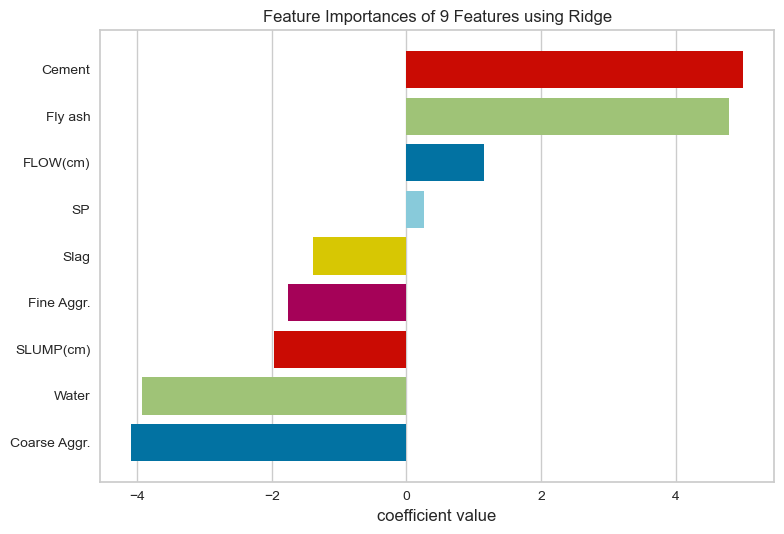

In [ ]:
from yellowbrick.model_selection import FeatureImportances

model = Ridge(alpha=pipe_ridgecv["ridgecv"].alpha_)  # ridge_cv_model.alpha_ = 0.91
viz = FeatureImportances(model,labels=list(X.columns), relative=False)
viz.fit(X_train_scaled,y_train)
viz.show();



## Feature importances with Lasso

In [ ]:
pipe_lassocv["lassocv"].alpha_

0.1

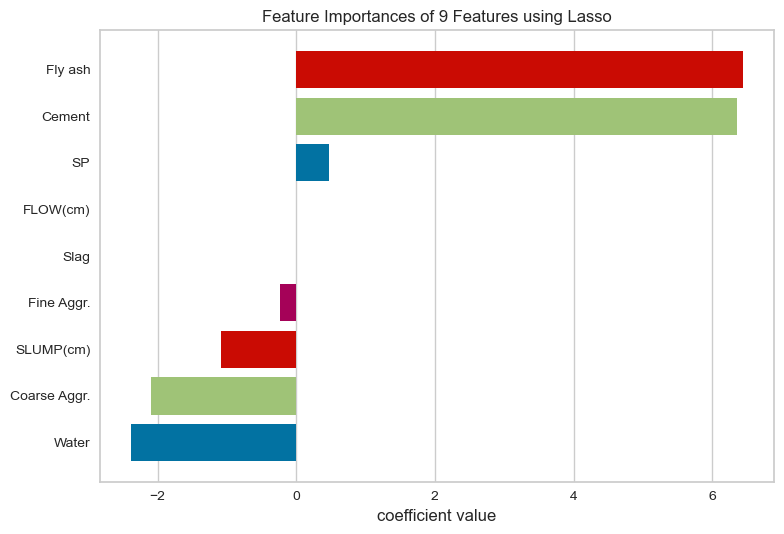

In [ ]:
from yellowbrick.model_selection import FeatureImportances

model = Lasso(alpha=pipe_lassocv["lassocv"].alpha_)  # lasso_cv_model.alpha_ = 0.1
viz = FeatureImportances(model,labels=list(X.columns),relative=False)
viz.fit(X_train_scaled,y_train)
viz.show();

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___